# Day 4 Introduction to machine learning in Python - Exercises with answers

## Exercise 1

### Question 1
#### Import the required packages.
#### Set the working directory to data directory.
#### Print the working directory.

#### Answer:

In [1]:
# Helper packages.
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
# Scikit-learn package for logistic regression.
from sklearn import linear_model
# Model set up and tuning packages from scikit-learn.
from sklearn.model_selection import train_test_split
# Scikit-learn packages for evaluating model performance.
from sklearn import metrics
# Scikit-learn package for data preprocessing.
from sklearn import preprocessing

In [2]:
# Set `home_dir` to the root directory of your computer.
home_dir = Path.home()

# Set `main_dir` to the location of your `skillsoft-intro-to-machine-learning-in-python` folder.
main_dir = home_dir / "Desktop" / "skillsoft-intro-to-machine-learning-in-python"

# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = main_dir / "data"

# Create a plot directory to save our plots
plot_dir = main_dir / "plots"

In [3]:
# Set working directory.
os.chdir(data_dir)

In [4]:
# Check working directory.
print(os.getcwd())

/Users/datasociety/Desktop/skillsoft-intro-to-machine-learning-in-python/data


### Question 2
#### Load the pickled dataset `ex_classification_cleaned.sav` and save it to `ex_classification`.
#### Drop `per_capita_income` from `ex_classification`.
#### Print the first few rows of `ex_classification`.
#### We don't need to do additional data preparation because we've done it during last session's exercise. 
#### Check the data types for all of the variables just in case.
#### Look at the count of each class in `income`.

#### Answer:

In [5]:
ex_classification = pickle.load(open('ex_classification_cleaned.sav','rb'))
ex_classification = ex_classification.drop(columns=['per_capita_income'])
ex_classification.head()

,percent_house_crowded,percent_house_below_poverty,percent_16_unemployed,percent_25_without_diploma,percent_dependent,hardship_index,income
0,7.7,23.6,8.7,18.2,27.5,39.0,False
1,7.8,17.2,8.8,20.8,38.5,46.0,False
2,3.8,24.0,8.9,11.8,22.2,20.0,True
3,3.4,10.9,8.2,13.4,25.5,17.0,True
4,0.3,7.5,5.2,4.5,26.2,6.0,True


In [6]:
print(ex_classification.dtypes)

percent_house_crowded          float64
percent_house_below_poverty    float64
percent_16_unemployed          float64
percent_25_without_diploma     float64
percent_dependent              float64
hardship_index                 float64
income                            bool
dtype: object


In [7]:
print(ex_classification.income.value_counts())

False    50
True     28
Name: income, dtype: int64


### Question 3
#### Set the random seed to 2.
#### Separate the predictors from the data by dropping the target variable `income` and save as `ex_X`.
#### Save target variable `income` as an np array to `ex_y`.
#### Split our data `ex_X` and `ex_y` into training and test sets. Split 70% into the training set and remaining 30% into the test set.
#### Save them as `ex_X_train`, `ex_X_test`, `ex_y_train` and `ex_y_test` respectively.

#### Answer:

In [8]:
# Set the seed.
np.random.seed(2)

# Split into x and y, y is categorical so it can't scale.
ex_X = ex_classification.drop(['income'],axis=1)
ex_y = np.array(ex_classification['income'])

In [9]:
# Split into train and test.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, 
                                                    ex_y, 
                                                    test_size=0.3) 

### Question 4
#### Instantiate the logistic regression model and save it to `ex_logistic_regression_model`. Print it.
#### Fit the model with our training sets `ex_X_train` and `ex_y_train`.
#### Note: If you encounter any warning, use the code below to set up the logistic regression model
#### ex_logistic_regression_model = linear_model.LogisticRegression(solver='lbfgs')

#### Answer:

In [10]:
# Set up logistic regression model.
ex_logistic_regression_model = linear_model.LogisticRegression()
print(ex_logistic_regression_model)


LogisticRegression()


In [11]:
# Fit the model.
ex_logistic_regression_model.fit(ex_X_train, 
                                 ex_y_train)

LogisticRegression()

### Question 5
#### Now use the trained model to predict on our test set `ex_X_test`. Save as `ex_predicted_values`.
#### Print the vector of predictions obtained.

#### Answer:

In [12]:
# Predict on test data.
ex_predicted_values = ex_logistic_regression_model.predict(ex_X_test)
print(ex_predicted_values)

[False False  True False  True  True False False False  True  True False
 False False  True False False False False False  True False  True False]


## Exercise 2

### Question 1
#### Create a confusion matrix using the `metrics.confusion_matrix()` function.
#### Save as `ex_conf_matrix` and print.
#### What can you determine by looking at the confusion matrix?

#### Answer:

In [13]:
ex_conf_matrix = metrics.confusion_matrix(ex_y_test, ex_predicted_values)
print(ex_conf_matrix)

[[15  2]
 [ 1  6]]


##### We see that the model has performed well in predicting correctly. We can expect a high accuracy.

### Question 2
#### Calculate the accuracy of our model by comparing our predicted values against our test set `ex_y_test`.
#### Save as `ex_test_accuracy` and print.

In [14]:
ex_test_accuracy = metrics.accuracy_score(ex_y_test, ex_predicted_values)
print("Accuracy on test data: ", ex_test_accuracy)

Accuracy on test data:  0.875


### Question 3
#### Load the pickled dataset `ex_model_final.sav` which we saved earlier.
#### Add the above accuracy score `ex_test_accuracy` calculated above to the dataframe `ex_model_final` which we created earlier and view the output.

#### Answer:

In [15]:
ex_model_final = pickle.load(open("ex_model_final.sav","rb"))
ex_model_final = ex_model_final.append({'metrics' : "accuracy" , 
                                  'values' : round(ex_test_accuracy,4),
                                  'model':'logistic' }, 
                                  ignore_index=True)
print(ex_model_final)

    metrics  values             model
0  accuracy  0.8333             knn_5
1  accuracy  0.9339  knn_GridSearchCV
2  accuracy  0.8750          logistic


### Question 4
#### Create a list named `target_names` with the class names, `Low Income` and `High Income`.
#### Create a report `ex_class_report` using our test values `ex_y_test` and predicted values `ex_predicted_values` with the following columns:
- precision
- recall
- f1-score
- target_names


#### Answer:

In [16]:
# Create a list of target names to interpret class assignments.
target_names = ['Low Income', 'High Income']

In [17]:
# Print an entire classification report.
class_report = metrics.classification_report(ex_y_test, 
                                             ex_predicted_values, 
                                             target_names = target_names)
print(class_report)

              precision    recall  f1-score   support

  Low Income       0.94      0.88      0.91        17
 High Income       0.75      0.86      0.80         7

    accuracy                           0.88        24
   macro avg       0.84      0.87      0.85        24
weighted avg       0.88      0.88      0.88        24



### Question 5
#### Get the probabilities of predicted values `ex_X_test` and save as `ex_test_probabilities`.
#### Then, calculate the probabilities of test predictions only.

#### Answer:

In [18]:
# Get probabilities instead of predicted values.
ex_test_probabilities = ex_logistic_regression_model.predict_proba(ex_X_test)
print(ex_test_probabilities[0:5, :])

[[9.99997754e-01 2.24554860e-06]
 [9.99982706e-01 1.72942474e-05]
 [3.06436122e-03 9.96935639e-01]
 [9.95221900e-01 4.77809980e-03]
 [2.23530105e-02 9.77646989e-01]]


In [19]:
# Get probabilities of test predictions only.
test_predictions = ex_test_probabilities[:, 1]
print(test_predictions)

[2.24554860e-06 1.72942474e-05 9.96935639e-01 4.77809980e-03
 9.77646989e-01 9.99171862e-01 1.30776373e-05 4.70762320e-05
 9.10753666e-02 9.95218418e-01 5.57145475e-01 1.36145028e-02
 1.15415239e-01 1.99866493e-05 9.38655738e-01 3.32983025e-08
 8.63900466e-05 4.51263262e-02 1.72557316e-03 3.38368267e-02
 6.88690068e-01 4.22613410e-04 9.62068777e-01 4.54263088e-01]


### Question 6
#### Derive the `fpr`, `tpr`, and the `threshold` using our test set and predictions.
#### Then, calculate the `auc` using the derived `fpr` and `tpr`.
#### Plot and ROC curve plot using the values derived above.

#### Answer:

In [20]:
# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(ex_y_test,         #<- test data labels
                                        test_predictions)  #<- predicted probabilities

In [21]:
# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)

Area under the ROC curve:  0.9831932773109243


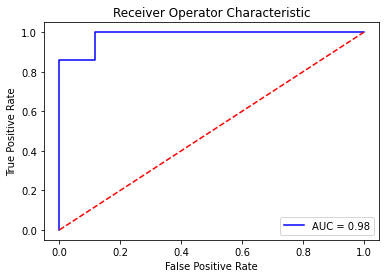

In [22]:
# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Exercise 3

### Question 1
#### For the purpose of demonstrating how to deal with categorical variables, we will convert `hardship_index` to a categorical variable with three variables.
#### Take a look at the summary of `hardship_index` using .describe().
#### To convert into categorical variable, for those rows where `hardship_index` is lower than the 25, convert to `25 or below`, for those higher than 25 but lower than 73, convert to `Between 25 and 73`, and the rest of the rows to `Higher than 73`.
#### Print the value counts of the new `hardship_index` column.

#### Answer:

In [23]:
ex_classification.hardship_index.describe()

count    78.000000
mean     49.506494
std      28.503645
min       1.000000
25%      25.250000
50%      49.753247
75%      73.750000
max      98.000000
Name: hardship_index, dtype: float64

In [24]:
ex_classification['hardship_index']=np.where(ex_classification['hardship_index']<=25,'25 or Below',
                                            np.where(ex_classification['hardship_index']<73, 'Between 25 and 73','Higher than 73'))

In [25]:
ex_classification.hardship_index.value_counts()

Between 25 and 73    37
Higher than 73       21
25 or Below          20
Name: hardship_index, dtype: int64

### Question 2

#### Transform `hardship_index` column into a dummy variable and save it into a dataframe named `hardship_dummy`.
#### Make sure to set `drop_first` as `True`.
#### Drop the original `hardship_index` variable from `ex_classification` and concatenate `hardship_dummy` into `ex_classification`.

#### Answer:

In [26]:
hardship_dummy = pd.get_dummies(ex_classification['hardship_index'], drop_first=True)
print(hardship_dummy.head())

   Between 25 and 73  Higher than 73
0                  1               0
1                  1               0
2                  0               0
3                  0               0
4                  0               0


In [27]:
ex_classification.drop(['hardship_index'], axis=1, inplace=True)

In [28]:
ex_classification = pd.concat ([ex_classification, hardship_dummy], axis=1)
ex_classification.head()

,percent_house_crowded,percent_house_below_poverty,percent_16_unemployed,percent_25_without_diploma,percent_dependent,income,Between 25 and 73,Higher than 73
0,7.7,23.6,8.7,18.2,27.5,False,1,0
1,7.8,17.2,8.8,20.8,38.5,False,1,0
2,3.8,24.0,8.9,11.8,22.2,True,0,0
3,3.4,10.9,8.2,13.4,25.5,True,0,0
4,0.3,7.5,5.2,4.5,26.2,True,0,0


### Question 3
#### As we did before, split the dataset into predictors `ex_X` and target `ex_y`.
#### Save target variable `income` as an np array to `ex_y`.
#### Save the rest of the variables to `ex_X`.
#### Split our data `ex_X` and `ex_y` into training and test sets. Split 70% into the training set and remaining 30% into the test set.
#### Save them as `ex_X_train`, `ex_X_test`, `ex_y_train` and `ex_y_test` respectively.
#### Make sure to set the seed to 2 so you can replicate the results.

#### Answer:

In [29]:
# We can drop just the target variable, as we are using all other variables as predictors.
ex_X = ex_classification.drop('income', axis = 1)
ex_y = np.array(ex_classification['income'])

In [30]:
# Set the seed.
np.random.seed(2)
# Split into training and test sets.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, 
                                                                ex_y, 
                                                                test_size=0.3) 

### Question 4
#### Instantiate the logistic regression model and save it to `ex_logistic_regression_model`. Print it.
#### Fit the model with our training sets `ex_X_train` and `ex_y_train`.

#### Answer:

In [31]:
# Set up logistic regression model.
ex_logistic_regression_model = linear_model.LogisticRegression(solver='liblinear')
print(ex_logistic_regression_model)

LogisticRegression(solver='liblinear')


In [32]:
# Fit the model.
ex_logistic_regression_model.fit(ex_X_train, 
                                 ex_y_train)

LogisticRegression(solver='liblinear')

### Question 5
#### Now use the trained model to predict on our test set `ex_X_test`. Save as `ex_predicted_values`.
#### Print the vector of predictions obtained.
#### Create a confusion matrix using the `metrics.confusion_matrix()` function.
#### Save as `ex_conf_matrix` and print.
#### Calculate the accuracy of our model by comparing our predicted values against our test set `ex_y_test`.

#### Answer:

In [33]:
# Predict on test data.
ex_predicted_values = ex_logistic_regression_model.predict(ex_X_test)
print(ex_predicted_values)

[False False  True False  True  True False False False False False False
  True False  True False False False False  True False False  True False]


In [34]:
ex_conf_matrix = metrics.confusion_matrix(ex_y_test, ex_predicted_values)
print(ex_conf_matrix)

[[15  2]
 [ 2  5]]


In [35]:
# Compute test model accuracy score.
ex_test_accuracy = metrics.accuracy_score(ex_y_test, ex_predicted_values)
print("Accuracy on test data: ", ex_test_accuracy)

Accuracy on test data:  0.8333333333333334


### Question 6
#### Add the accuracy score `ex_test_accuracy` calculated above with the model name as `logistic_withdummies` to the dataframe `ex_model_final` which we created earlier and view the output.

#### Answer:

In [36]:
ex_model_final = ex_model_final.append({'metrics' : "accuracy" , 
                                  'values' : round(ex_test_accuracy,4),
                                  'model':'logistic_withdummies' } , 
                                  ignore_index=True)
print(ex_model_final)

    metrics  values                 model
0  accuracy  0.8333                 knn_5
1  accuracy  0.9339      knn_GridSearchCV
2  accuracy  0.8750              logistic
3  accuracy  0.8333  logistic_withdummies


### Question 7
#### Create a list named `target_names` with the class names as `Low Income` and `High Income`.
#### Create a report `ex_class_report` using our test values `ex_y_test` and predicted values `ex_predicted_values` with the following columns:
- precision
- recall
- f1-score
- target_names


#### Answer:

In [37]:
# Create a list of target names to interpret class assignments.
target_names = ['Low Income', 'High Income']

In [38]:
# Print an entire classification report.
class_report = metrics.classification_report(ex_y_test, 
                                             ex_predicted_values, 
                                             target_names = target_names)
print(class_report)

              precision    recall  f1-score   support

  Low Income       0.88      0.88      0.88        17
 High Income       0.71      0.71      0.71         7

    accuracy                           0.83        24
   macro avg       0.80      0.80      0.80        24
weighted avg       0.83      0.83      0.83        24



### Question 8
#### Get the probabilities of predicted values `ex_X_test` and save as `ex_test_probabilities`.
#### Then calculate the probabilities of test predictions named `ex_test_predictions`  only. 
#### Derive the `fpr`, `tpr`, and the `threshold` using our test set and predictions.
#### Then calculate the `auc` using the derived `fpr` and `tpr`.

#### Answer:

In [39]:
# Get probabilities instead of predicted values.
ex_test_probabilities = ex_logistic_regression_model.predict_proba(ex_X_test)
print(ex_test_probabilities[0:5, :])

[[0.99431949 0.00568051]
 [0.99697872 0.00302128]
 [0.47304486 0.52695514]
 [0.98975627 0.01024373]
 [0.02652213 0.97347787]]


In [40]:
# Get probabilities of test predictions only.
ex_test_predictions = ex_test_probabilities[:, 1]
print(ex_test_predictions[0:5])

[0.00568051 0.00302128 0.52695514 0.01024373 0.97347787]


In [41]:
# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(ex_y_test,            #<- test data labels
                                        ex_test_predictions)  #<- predicted probabilities

In [42]:
# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)

Area under the ROC curve:  0.9159663865546218


### Question 9
#### Plot and ROC curve plot using the values derived above.

#### Answer:

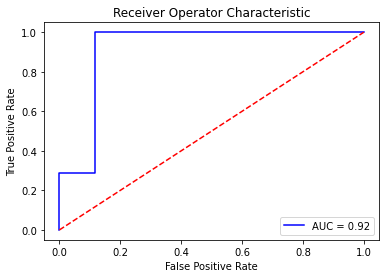

In [43]:
# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()